In [59]:
import pandas as pd

In [60]:
df=pd.read_csv("serchresult.csv")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2358 non-null   int64  
 1   v_id           2358 non-null   object 
 2   v_title        2358 non-null   object 
 3   Keyword        2358 non-null   object 
 4   publishedDate  2358 non-null   object 
 5   v_description  2298 non-null   object 
 6   viewCount      2358 non-null   int64  
 7   likeCount      2332 non-null   float64
 8   dislikeCount   2332 non-null   float64
 9   favoriteCount  2358 non-null   int64  
 10  commentCount   2308 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 202.8+ KB


In [62]:
df.nunique()

Unnamed: 0       2358
v_id             2358
v_title          2349
Keyword            50
publishedDate    2354
v_description    2256
viewCount        2325
likeCount        1510
dislikeCount      418
favoriteCount       1
commentCount      589
dtype: int64

In [63]:
df.commentCount.fillna(0,inplace=True)
df.likeCount.fillna(0,inplace=True)
df.dislikeCount.fillna(0,inplace=True)
df.v_description.fillna("Not Available",inplace=True)

In [64]:
df.isnull().sum()

Unnamed: 0       0
v_id             0
v_title          0
Keyword          0
publishedDate    0
v_description    0
viewCount        0
likeCount        0
dislikeCount     0
favoriteCount    0
commentCount     0
dtype: int64

In [65]:
data=df.drop({"Unnamed: 0","publishedDate","favoriteCount"},axis=1)

In [66]:
data.describe(include="all")

,v_id,v_title,Keyword,v_description,viewCount,likeCount,dislikeCount,commentCount
count,2358,2358,2358,2358,2.358000e+03,2358.000000,2358.000000,2358.000000
unique,2358,2349,50,2257,NaN,NaN,NaN,NaN
top,Q57rzaHHO0k,Introduction to Decision Trees,Arificial Intelligence,Not Available,NaN,NaN,NaN,NaN
freq,1,2,50,60,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.888502e+05,5666.691264,141.921544,306.523325
std,NaN,NaN,NaN,NaN,2.769733e+06,32881.538611,874.085152,1762.308611
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,6.748750e+03,135.000000,3.000000,10.000000
50%,NaN,NaN,NaN,NaN,3.192800e+04,571.000000,15.000000,40.000000
75%,NaN,NaN,NaN,NaN,1.437398e+05,2602.250000,68.000000,154.000000


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
import warnings
warnings.filterwarnings('ignore')

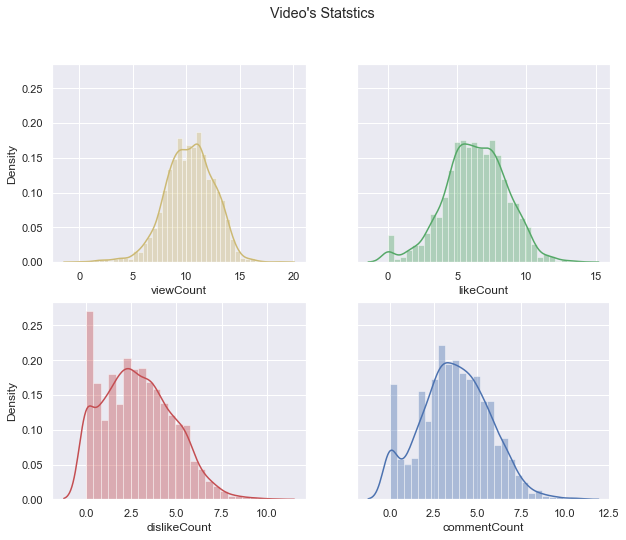

In [68]:
fig, ax= plt.subplots(2,2,figsize=(10,8),sharey=True)
fig.suptitle("Video's Statstics")

sns.distplot(ax=ax[0,0],a=np.log(data["viewCount"]+1),color="y")


sns.distplot(ax=ax[0,1],a=np.log(data["likeCount"]+1),color="g")


sns.distplot(ax=ax[1,0],a=np.log(data["dislikeCount"]+1),color="r")


sns.distplot(ax=ax[1,1],a=np.log(data["commentCount"]+1),color="b")

plt.show()


Text(0.5, 1.0, 'Correlation Plot')

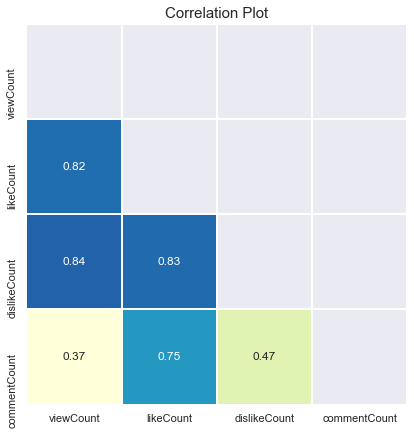

In [69]:
corr = data.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(7,7)) 
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,cbar=False, vmax=1, square=True,cmap="YlGnBu",linewidths=.5,annot=True)
ax.set_title('Correlation Plot', size=15)

In [70]:
most_likedId = data['likeCount'].idxmax()
most_viewdId = data['viewCount'].idxmax()
most_dislikedId = data['dislikeCount'].idxmax()
most_commentedId = data['commentCount'].idxmax()

In [71]:
data.iloc[most_likedId]

v_id                                                   __TvPr_Wtvc
v_title              Timmy Trumpet - Oracle (Official Music Video)
Keyword                                                     Oracle
v_description    Timmy Trumpet - Oracle is OUT NOW! Like this t...
viewCount                                                126670859
likeCount                                                   981902
dislikeCount                                                 29806
commentCount                                                 11532
Name: 396, dtype: object

In [72]:
data.iloc[most_viewdId]

v_id                                                   __TvPr_Wtvc
v_title              Timmy Trumpet - Oracle (Official Music Video)
Keyword                                                     Oracle
v_description    Timmy Trumpet - Oracle is OUT NOW! Like this t...
viewCount                                                126670859
likeCount                                                   981902
dislikeCount                                                 29806
commentCount                                                 11532
Name: 396, dtype: object

In [73]:
data.iloc[most_dislikedId]

v_id                                                   __TvPr_Wtvc
v_title              Timmy Trumpet - Oracle (Official Music Video)
Keyword                                                     Oracle
v_description    Timmy Trumpet - Oracle is OUT NOW! Like this t...
viewCount                                                126670859
likeCount                                                   981902
dislikeCount                                                 29806
commentCount                                                 11532
Name: 396, dtype: object

In [74]:
data.iloc[most_commentedId]

v_id                                                   gfDE2a7MKjA
v_title          Python Tutorial For Beginners In Hindi (With N...
Keyword                                         Python Programming
v_description    Learn Python One Video in Hindi: This Python P...
viewCount                                                  3792135
likeCount                                                   156579
dislikeCount                                                  1734
commentCount                                                 43642
Name: 98, dtype: object

In [75]:
data1=data.drop(["v_id","dislikeCount","commentCount","viewCount","likeCount"],axis=1)
data1.head()

,v_title,Keyword,v_description
0,Data Science Full Course - Learn Data Science ...,Python for data science,"🔥 Data Science Master Program (Use Code ""𝐘𝐎𝐔𝐓𝐔..."
1,Data Science In 5 Minutes | Data Science For B...,Python for data science,🔥Free Data Science with Python course: https:/...
2,Data Science Tutorial | Data Science for Begin...,Python for data science,🔥Get the free certificate of completion for th...
3,What REALLY is Data Science? Told by a Data Sc...,Data science,Interested in Data Science? Start with learnin...
4,Complete Roadmap to Become a Data Scientist,Python for data science,How to become a Data Scientist: Become a self ...


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import spacy 
from nltk.corpus import stopwords
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora

In [77]:
stop=stopwords.words('english')

In [78]:
data1['v_title'] = data1['v_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [79]:
data1["v_title"] = data1["v_title"].apply(lambda x: x.lower())

In [80]:
data1['v_description'] = data1['v_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data1["v_description"] = data1["v_description"].apply(lambda x: x.lower())

In [81]:
data1['Keyword'] = data1['Keyword'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data1["Keyword"] = data1["Keyword"].apply(lambda x: x.lower())

In [82]:
data1.head()

,v_title,Keyword,v_description
0,data science full course - learn data science ...,python data science,"🔥 data science master program (use code ""𝐘𝐎𝐔𝐓𝐔..."
1,data science in 5 minutes | data science for b...,python data science,🔥free data science python course: https://www....
2,data science tutorial | data science beginners...,python data science,🔥get free certificate completion data science ...
3,what really data science? told data scientist,data science,interested data science? start learning sql qu...
4,complete roadmap become data scientist,python data science,how become data scientist: become self taught ...


In [83]:
def spacy_tokenizer(sentence):
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)
    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)
    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)
    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence) 
    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    sentence =re.sub(' +','',sentence)
    return sentence

In [84]:
data1['v_title'] = data1['v_title'].map(lambda x: spacy_tokenizer(x))
data1['v_description']=data1['v_description'].map(lambda x: spacy_tokenizer(x))

In [85]:
data1.head()

,v_title,Keyword,v_description
0,datasciencefullcourselearndatasciencehoursdata...,python data science,datasciencemasterprogramusecodehttpswwwedureka...
1,datascienceinminutesdatascienceforbeginnerswha...,python data science,freedatasciencepythoncoursehttpswwwsimplilearn...
2,datasciencetutorialdatasciencebeginnerspythond...,python data science,getfreecertificatecompletiondatasciencepythonc...
3,whatreallydatasciencetolddatascientist,data science,interesteddatasciencestartlearningsqlquerydata...
4,completeroadmapbecomedatascientist,python data science,howbecomedatascientistbecomeselftaughtdatascie...


In [155]:
data1['Bag_of_words'] = ''
columns = ['v_title',"v_description","Keyword"] 
for index, row in data1.iterrows():
    words = ''
    for col in columns:
        words +=''.join(row[col]) + ''
    row['Bag_of_words'] = words

In [156]:
data1.head()

,v_title,Keyword,v_description,Bag_of_words
0,datasciencefullcourselearndatasciencehoursdata...,python data science,datasciencemasterprogramusecodehttpswwwedureka...,datasciencefullcourselearndatasciencehoursdata...
1,datascienceinminutesdatascienceforbeginnerswha...,python data science,freedatasciencepythoncoursehttpswwwsimplilearn...,datascienceinminutesdatascienceforbeginnerswha...
2,datasciencetutorialdatasciencebeginnerspythond...,python data science,getfreecertificatecompletiondatasciencepythonc...,datasciencetutorialdatasciencebeginnerspythond...
3,whatreallydatasciencetolddatascientist,data science,interesteddatasciencestartlearningsqlquerydata...,whatreallydatasciencetolddatascientistinterest...
4,completeroadmapbecomedatascientist,python data science,howbecomedatascientistbecomeselftaughtdatascie...,completeroadmapbecomedatascientisthowbecomedat...


In [157]:
data2=data1.drop(["v_title","v_description"],axis=1)

In [158]:
data2

,Keyword,Bag_of_words
0,python data science,datasciencefullcourselearndatasciencehoursdata...
1,python data science,datascienceinminutesdatascienceforbeginnerswha...
2,python data science,datasciencetutorialdatasciencebeginnerspythond...
3,data science,whatreallydatasciencetolddatascientistinterest...
4,python data science,completeroadmapbecomedatascientisthowbecomedat...
...,...,...
2353,hypothesis testing,hypothesistestingtypesselectioncorrecttestprac...
2354,hypothesis testing,testinghypothesisteluguhypothesistestingproces...
2355,hypothesis testing,levelicfaquanthypothesistestinglecturethisread...
2356,hypothesis testing,whathypothesisparttypeshypothesisnullampaltern...


In [159]:
count = CountVectorizer()
count_matrix = count.fit_transform(data2['Bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.66666667 0.66666667 ... 0.         0.         0.        ]
 [0.66666667 1.         0.66666667 ... 0.         0.         0.        ]
 [0.66666667 0.66666667 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.5       ]
 [0.         0.         0.         ... 0.5        1.         0.5       ]
 [0.         0.         0.         ... 0.5        0.5        1.        ]]


In [160]:
indices = pd.Series(data2['Keyword'])

In [161]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:20].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(data1['Keyword'])[i])
        
    return recommended_movies

In [162]:
recommend("time series analysis")

['time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis',
 'time series analysis']

In [163]:
data2.Keyword.unique()

array(['python data science', 'data science', 'math data science',
       'soft skills data science', 'data analysis', 'deep learning',
       'business analytics', 'data analytics', 'data engineer',
       'data visualization', 'programming', 'python programming',
       'algorithms', 'tableau', 'machine learning', 'neural network',
       'statistics', 'probability in statistics', 'statistical analysis',
       'hypothesis testing', 'mysql', 'sql', 'oracle', 'confusion matrix',
       'arificial intelligence', 'seaborn', 'big data', 'r studio',
       'natural language processing', 'sentimental analysis',
       'text mining', 'feature engineering', 'feature selection',
       'exploratory data analysis', 'data science projects', 'streamlit',
       'forecasting', 'clustering algorithm', 'hadoop', 'numpy',
       'python libraries', 'matplotlib', 'time series analysis',
       'web scrapping', 'random forest', 'data cleaning',
       'data warehousing', 'data mining', 'recommender sy